# A genetic algorithm for optimizing traveling salesman problem (harder case)

Suppose there are some nodes that are labeled by $1,2,\dots,n$ and $d_{i,j}$ represents the distance from node $i$ to node $j$. The objective of the traveling salesman problem (TSP) is to find the shortest route that visits each node exactly ones and returns to the origin city.

A solution of a TSP can be written as a permutation $p_1 p_2\dots p_n$ of the elements $1,2,\dots,n$. The distance of $p_1 p_2\dots p_n$ is calculated by

$$
\sum_{i=1}^{n}d_{p_i,p_{i+1}}
$$

where $p_{n+1} = p_1$.

https://github.com/luthfishahab/geneticalgorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([0, 20, 40, 100, 100, 100, 80, 60,  0,  0, 40, 40, 60, 50, 30, 90, 10, 20, 60, 80, 20, 60, 80, 40, 70, 30, 70])
y = np.array([0,  0,  0,   0,  30,  50, 50, 50, 50, 20, 20, 30, 20, 25, 10, 15, 30, 40, 40, 40, 10, 10, 20, 40,  5, 25, 30])

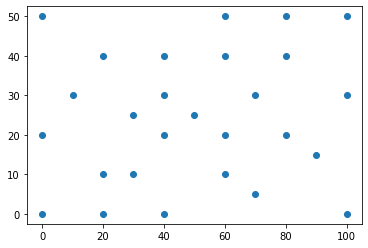

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
# number of cities / points
m = len(x)

# number of chromosomes in population
n = 1000

# maximum generation
N = 300

In [5]:
# distance matrix
d = np.zeros((m, m), dtype=int)

for i in range(m):
    for j in range(m):
        d[i, j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)

d

array([[  0,  20,  40, 100, 104, 111,  94,  78,  50,  20,  44,  50,  63,
         55,  31,  91,  31,  44,  72,  89,  22,  60,  82,  56,  70,  39,
         76],
       [ 20,   0,  20,  80,  85,  94,  78,  64,  53,  28,  28,  36,  44,
         39,  14,  71,  31,  40,  56,  72,  10,  41,  63,  44,  50,  26,
         58],
       [ 40,  20,   0,  60,  67,  78,  64,  53,  64,  44,  20,  30,  28,
         26,  14,  52,  42,  44,  44,  56,  22,  22,  44,  40,  30,  26,
         42],
       [100,  80,  60,   0,  30,  50,  53,  64, 111, 101,  63,  67,  44,
         55,  70,  18,  94,  89,  56,  44,  80,  41,  28,  72,  30,  74,
         42],
       [104,  85,  67,  30,   0,  20,  28,  44, 101, 100,  60,  60,  41,
         50,  72,  18,  90,  80,  41,  22,  82,  44,  22,  60,  39,  70,
         30],
       [111,  94,  78,  50,  20,   0,  20,  40, 100, 104,  67,  63,  50,
         55,  80,  36,  92,  80,  41,  22,  89,  56,  36,  60,  54,  74,
         36],
       [ 94,  78,  64,  53,  28,  20,   

In [6]:
def createPopulation():
    pop = np.zeros((n, m), dtype=int)

    for i in range(n):
        pop[i] = np.random.permutation(m)

    pop = pd.DataFrame(pop)

    return pop

In [7]:
def fitness(pop):
    fitness = np.zeros(n, dtype=int)

    for k in range(n):
        a = pop.loc[k]

        b = 0
        for i in range(0, m-1):
            b += d[a[i], a[i+1]]
        b += d[a[m-1], a[0]]

        fitness[k] = b

    pop['fitness'] = fitness

    return pop

In [8]:
# You can define your randomSelection here
def randomSelection():
    position = np.random.permutation(n)

    return position[0], position[1]

In [9]:
# You can define your crossover here
def crossover(pop):
    popc = pop.copy()
    for i in range(n):
        a, b = randomSelection()
        x = (pop.loc[a] + pop.loc[b])/2
        popc.loc[i] = x

    return popc

In [10]:
def mutation(pop):
    popm = pop.copy()

    for i in range(n):
        position = np.random.permutation(m)
        a = position[0]
        b = position[1]
        temp = popm.loc[i][a]
        popm.loc[i][a] = popm.loc[i][b]
        popm.loc[i][b] = temp

    return popm

In [11]:
def combinePopulation(pop, popm):
    popAll = pd.concat([pop, popm])

    popAll = popAll.drop_duplicates()

    popAll.index = range(len(popAll))

    return popAll

In [12]:
def sort(popAll):
    popAll = popAll.sort_values(by=['fitness'])

    popAll.index = range(len(popAll))

    return popAll

In [13]:
def elimination(popAll):
    pop = popAll.head(n)

    return pop

In [14]:
def plotSolution(pop):
    solution = pop.loc[0]
    solution = solution.to_numpy()

    a = np.zeros(m+1, dtype=int)
    b = np.zeros(m+1, dtype=int)

    for i in range(m):
        a[i] = x[solution[i]]
        b[i] = y[solution[i]]

    a[m] = a[0]
    b[m] = b[0]

    plt.plot(a, b, marker = 'o')
    plt.show()

Solution in population 0
   0  1   2  3   4   5   6   7   8  9  ...  18  19  20  21  22  23  24  25  \
0  1  3  24  4  16  13  22  19  12  8  ...  11  21  17   2   0  10  23  26   

   26  fitness  
0  18     1171  

[1 rows x 28 columns]


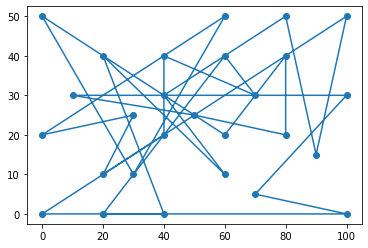


Best solution in population 10
   0   1   2   3  4  5   6  7   8  9  ...  18  19  20  21  22  23  24  25  26  \
0  5  13  17  16  0  9  20  1  14  8  ...  11  23  10   2  25  22  26  19   3   

   fitness  
0      752  

[1 rows x 28 columns]


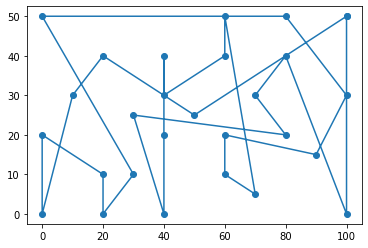


Best solution in population 20
   0   1   2  3   4   5   6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  6  14  10  3  15  22  18  25  13  26  ...   2  12  11  23  21  24  19   5   

   26  fitness  
0   4      705  

[1 rows x 28 columns]


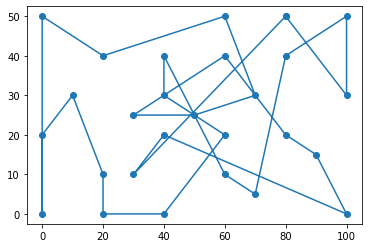


Best solution in population 30
   0   1   2  3   4   5  6  7   8  9  ...  18  19  20  21  22  23  24  25  26  \
0  3  15  21  2  17  25  8  0  14  1  ...   6   5  26  13  11  10  24  22   4   

   fitness  
0      673  

[1 rows x 28 columns]


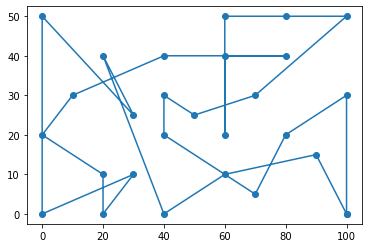


Best solution in population 40
   0   1   2   3   4   5  6  7   8  9  ...  18  19  20  21  22  23  24  25  \
0  3  15  21  12  17  16  8  0  14  1  ...   6   5  13  10  11   2  24  22   

   26  fitness  
0   4      609  

[1 rows x 28 columns]


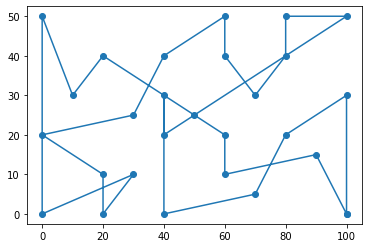


Best solution in population 50
   0   1  2   3   4   5   6  7   8   9  ...  18  19  20  21  22  23  24  25  \
0  6  18  7  25  12  21  24  3  13  26  ...   2  14  11  10  22  15   4   5   

   26  fitness  
0  19      603  

[1 rows x 28 columns]


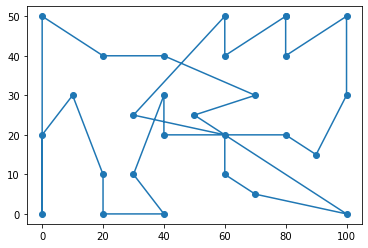


Best solution in population 60
    0   1  2  3  4  5   6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  24  20  1  0  9  8  16  17  25  10  ...  18   6   5   3   4  19   7  26   

   26  fitness  
0  15      574  

[1 rows x 28 columns]


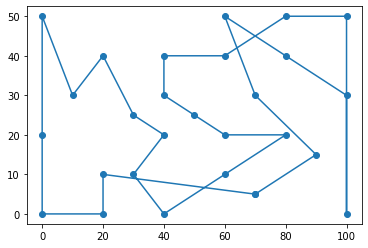


Best solution in population 70
    0   1  2  3  4  5   6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  8  16  17  25  10  ...  19   6   5   4   3  15   7  11   

   26  fitness  
0   2      545  

[1 rows x 28 columns]


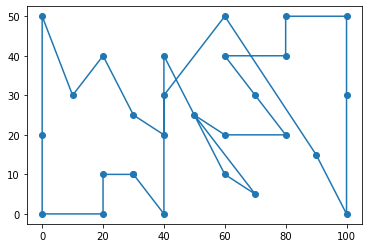


Best solution in population 80
    0   1  2  3  4  5   6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  8  16  17  25  10  ...  19   6   5   4   3  15   7  11   

   26  fitness  
0  23      528  

[1 rows x 28 columns]


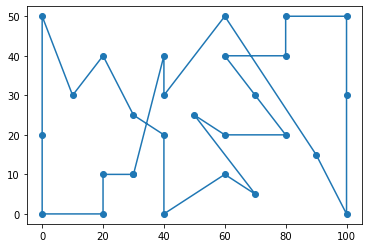


Best solution in population 90
   0   1  2   3   4   5   6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  6  18  7  26  11  14  10  12  13  25  ...   2  21  24   3  22  15   4   5   

   26  fitness  
0  19      511  

[1 rows x 28 columns]


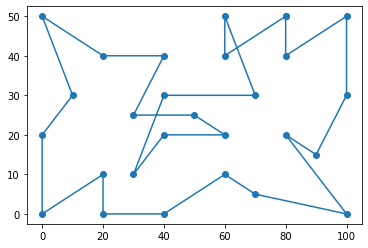


Best solution in population 100
    0   1  2  3  4  5   6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  8  16  17  25  10  ...  19   6   5   4  15   3  24  11   

   26  fitness  
0   2      501  

[1 rows x 28 columns]


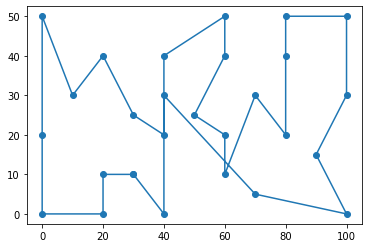


Best solution in population 110
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  10  ...   7   6   5   4   3  15  21  24   

   26  fitness  
0   2      499  

[1 rows x 28 columns]


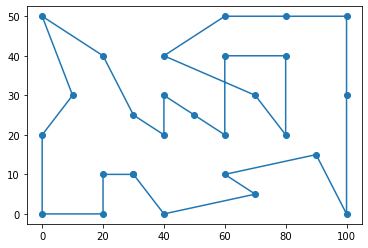


Best solution in population 120
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  11  23  ...  19   6   5   4   3  15  24  21   

   26  fitness  
0   2      473  

[1 rows x 28 columns]


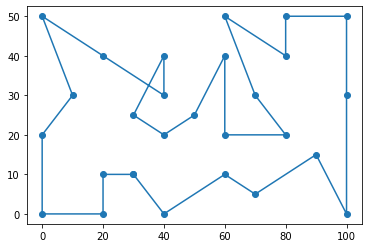


Best solution in population 130
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  11  23  ...  19   6   5   4   3  15  24  21   

   26  fitness  
0   2      473  

[1 rows x 28 columns]


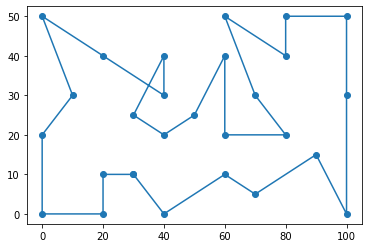


Best solution in population 140
    0   1  2  3  4  5   6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  8  16  17  25  10  ...  19   6   5   4   3  15  22  26   

   26  fitness  
0   2      472  

[1 rows x 28 columns]


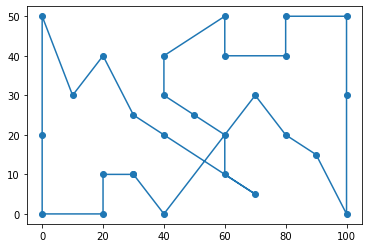


Best solution in population 150
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  10  ...  19   6   5   4   3  15  22  21   

   26  fitness  
0   2      467  

[1 rows x 28 columns]


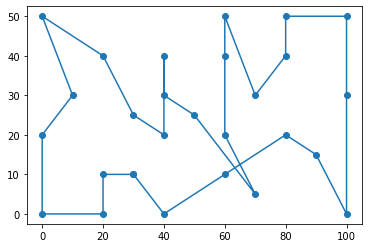


Best solution in population 160
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  10  ...  19   6   5   4   3  15  24  21   

   26  fitness  
0   2      461  

[1 rows x 28 columns]


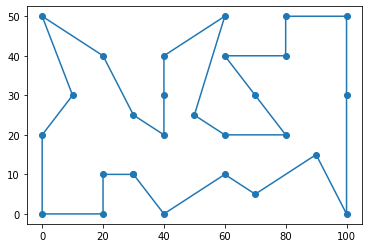


Best solution in population 170
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  10  ...  19   6   5   4   3  15  24  21   

   26  fitness  
0   2      461  

[1 rows x 28 columns]


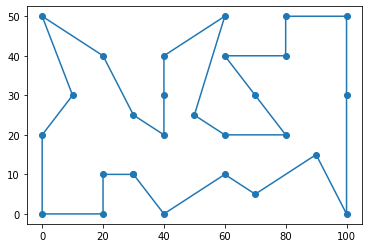


Best solution in population 180
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  11  ...  19   6   5   4   3  15  24  21   

   26  fitness  
0   2      454  

[1 rows x 28 columns]


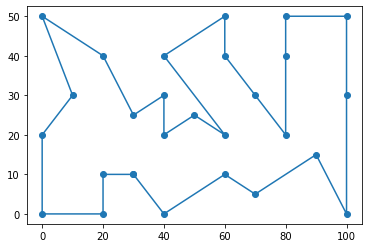


Best solution in population 190
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  11  ...  19   6   5   4   3  15  24  21   

   26  fitness  
0   2      454  

[1 rows x 28 columns]


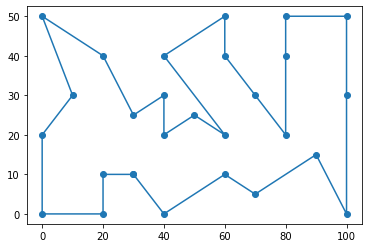


Best solution in population 200
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  11  ...  19   6   5   4   3  15  24  21   

   26  fitness  
0   2      454  

[1 rows x 28 columns]


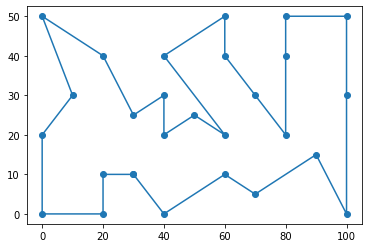


Best solution in population 210
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  11  ...  19   6   5   4   3  15  24  21   

   26  fitness  
0   2      453  

[1 rows x 28 columns]


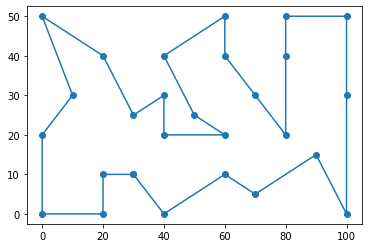


Best solution in population 220
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  11  ...  19   6   5   4   3  15  24  21   

   26  fitness  
0   2      453  

[1 rows x 28 columns]


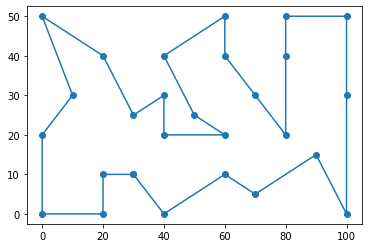


Best solution in population 230
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  10  ...  19   6   5   4   3  15  24  21   

   26  fitness  
0   2      451  

[1 rows x 28 columns]


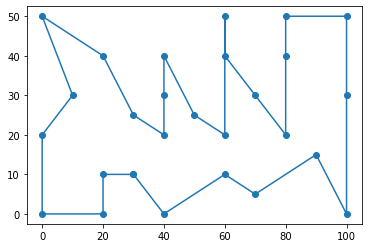


Best solution in population 240
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  10  ...  19   6   5   4  15   3  24  21   

   26  fitness  
0   2      439  

[1 rows x 28 columns]


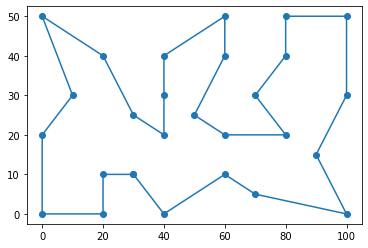


Best solution in population 250
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  10  ...  19   6   5   4  15   3  24  21   

   26  fitness  
0   2      439  

[1 rows x 28 columns]


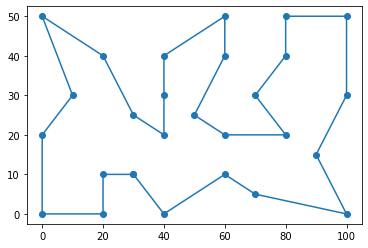


Best solution in population 260
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  10  ...  19   6   5   4  15   3  24  21   

   26  fitness  
0   2      439  

[1 rows x 28 columns]


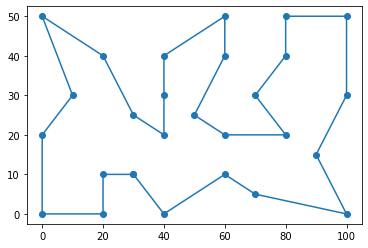


Best solution in population 270
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  10  ...  19   6   5   4  15   3  24  21   

   26  fitness  
0   2      439  

[1 rows x 28 columns]


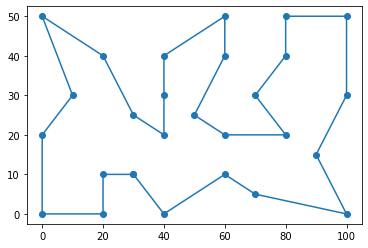


Best solution in population 280
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  10  ...  19   6   5   4  15   3  24  21   

   26  fitness  
0   2      439  

[1 rows x 28 columns]


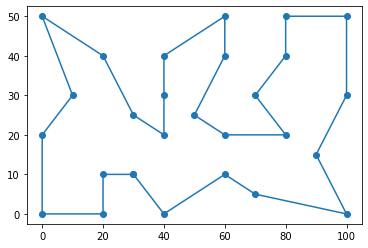


Best solution in population 290
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  10  ...  19   6   5   4  15   3  24  21   

   26  fitness  
0   2      439  

[1 rows x 28 columns]


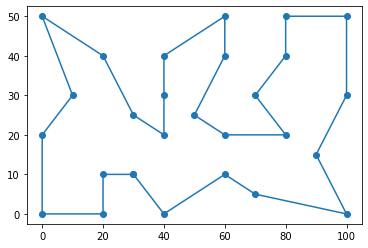


Best solution in population 300
    0   1  2  3  4   5  6   7   8   9  ...  18  19  20  21  22  23  24  25  \
0  14  20  1  0  9  16  8  17  25  10  ...  19   6   5   4  15   3  24  21   

   26  fitness  
0   2      439  

[1 rows x 28 columns]


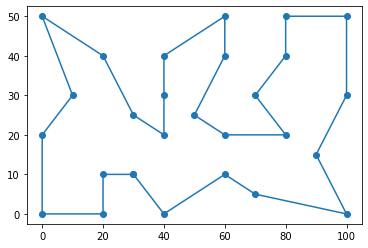

In [15]:
pop = createPopulation()
pop = fitness(pop)
print('Solution in population 0')
print(pop.head(1))
plotSolution(pop)

for i in range(1, N+1):
    #popc = crossover(pop)
    #popc = fitness(popc)

    popm = mutation(pop)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popm)

    popAll = sort(popAll)

    pop = elimination(popAll)

    if i%10 == 0:
        print()
        print('Best solution in population '+ str(i))
        print(pop.head(1))
        plotSolution(pop)